# **A Pipeline for Building Text Classification Systems**

One typically follows these steps when building a text classification system:
1. Collect or create a labeled dataset suitable for the task.
2. Split the dataset into two (training and test) or three parts: training, validation
(i.e., development), and test sets, then decide on evaluation metric(s).
3. Transform raw text into feature vectors.
4. Train a classifier using the feature vectors and the corresponding labels from the
training set.
5. Using the evaluation metric(s) from Step 2, benchmark the model performance
on the test set.
6. Deploy the model to serve the real-world use case and monitor its performance.

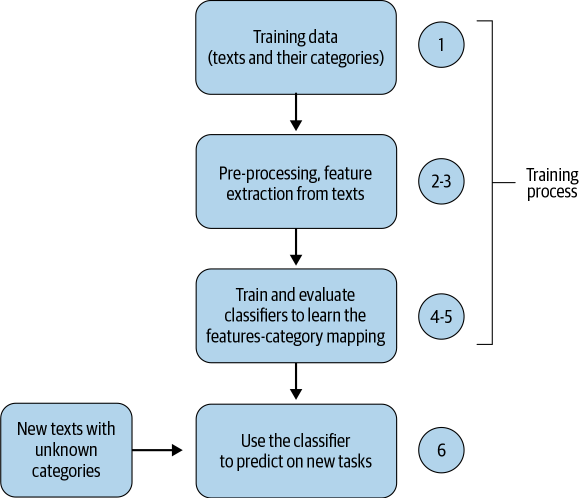

## **A Simple Classifier Without the Text Classification Pipeline**

It’s possible to build a simple classifier without machine learning and without this pipeline. 

Consider the following problem scenario: we’re given a corpus of tweets where each tweet is labeled with its corresponding sentiment: negative or positive. 

* “The new James Bond movie is great!” is a positive sentiment
* “I would never visit this restaurant again, horrible place!!” has a negative sentiment.

We want to build a classification system that will predict the sentiment of an
unseen tweet using only the text of the tweet. 

A simple solution could be to 
* create lists of positive and negative words in English—i.e., words that have a positive or negative sentiment. 
* compare the usage of positive versus negative words in the input tweet and make a prediction based on this information. 

This approach is called lexicon-based sentiment analysis.

## **Measuring Sentiment**

_**Sentiment analysis**_ — measuring the sentiment of phrases or chunks of text—is a common application of NLP. 

There are two approaches to sentiment analysis:
* A rule-based algorithm composed by a human
* A machine learning model learned from data by a machine

### **VADER—A rule-based sentiment analyzer**

Hutto and Gilbert at Georgia Tech created a rule-based sentiment analysis algorithms called **VADER** (**V**alence **A**ware **D**ictionary for s**E**ntiment **R**easoning).

The NLTK package has an implementation of the VADER algorithm in `nltk.sentiment.vader`.

In [ ]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 4.8 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# SentimentIntensityAnalyzer.lexicon contains that
# dictionary of tokens and their scores that we talked about.
sa = SentimentIntensityAnalyzer()

In [ ]:
# A tokenizer should be good at dealing with punctuation and emoticons (emojis) 
# for VADER to work well. After all, emoticons are designed to convey a lot of 
# sentiment (emotion).
sa.lexicon

{'$:': -1.5,
 '%)': -0.4,
 '%-)': -1.5,
 '&-:': -0.4,
 '&:': -0.7,
 "( '}{' )": 1.6,
 '(%': -0.9,
 "('-:": 2.2,
 "(':": 2.3,
 '((-:': 2.1,
 '(*': 1.1,
 '(-%': -0.7,
 '(-*': 1.3,
 '(-:': 1.6,
 '(-:0': 2.8,
 '(-:<': -0.4,
 '(-:o': 1.5,
 '(-:O': 1.5,
 '(-:{': -0.1,
 '(-:|>*': 1.9,
 '(-;': 1.3,
 '(-;|': 2.1,
 '(8': 2.6,
 '(:': 2.2,
 '(:0': 2.4,
 '(:<': -0.2,
 '(:o': 2.5,
 '(:O': 2.5,
 '(;': 1.1,
 '(;<': 0.3,
 '(=': 2.2,
 '(?:': 2.1,
 '(^:': 1.5,
 '(^;': 1.5,
 '(^;0': 2.0,
 '(^;o': 1.9,
 '(o:': 1.6,
 ")':": -2.0,
 ")-':": -2.1,
 ')-:': -2.1,
 ')-:<': -2.2,
 ')-:{': -2.1,
 '):': -1.8,
 '):<': -1.9,
 '):{': -2.3,
 ');<': -2.6,
 '*)': 0.6,
 '*-)': 0.3,
 '*-:': 2.1,
 '*-;': 2.4,
 '*:': 1.9,
 '*<|:-)': 1.6,
 '*\\0/*': 2.3,
 '*^:': 1.6,
 ',-:': 1.2,
 "---'-;-{@": 2.3,
 '--<--<@': 2.2,
 '.-:': -1.2,
 '..###-:': -1.7,
 '..###:': -1.9,
 '/-:': -1.3,
 '/:': -1.3,
 '/:<': -1.4,
 '/=': -0.9,
 '/^:': -1.0,
 '/o:': -1.4,
 '0-8': 0.1,
 '0-|': -1.2,
 '0:)': 1.9,
 '0:-)': 1.4,
 '0:-3': 1.5,
 '0:03': 1.9,
 '

{ ... \\
':(': -1.9, \\
':)': 2.0, \\
... \\
'pls': 0.3, \\
'plz': 0.3, \\
... \\
'great ': 3.1, \\
... } \\


If you use a stemmer (or lemmatizer) in your pipeline, you’ll need to
apply that stemmer to the VADER lexicon, too, combining the scores
for all the words that go together in a single stem or lemma.

In [ ]:
[(tok, score) for tok, score in sa.lexicon.items() if " " in tok]

[("( '}{' )", 1.6),
 ("can't stand", -2.0),
 ('fed up', -1.8),
 ('screwed up', -1.5)]

Out of 7500 tokens defined in VADER, only 4
contain spaces, and only 3 of those are actually
n-grams; the other is an emoticon for “kiss.”

In [ ]:
sa.polarity_scores(text="Python is very readable and it's great for NLP.")

{'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'compound': 0.6249}

The VADER algorithm considers the intensity of
sentiment polarity in three separate scores (positive,
negative, and neutral) and then combines them
together into a compound positivity sentiment.

In [ ]:
sa.polarity_scores(text="Python is not a bad choice for most applications.")

{'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'compound': 0.431}

Notice that VADER handles negation pretty well—“great”
has a slightly more positive sentiment than “not bad.”
VADER’s built-in tokenizer ignores any words that aren’t
in its lexicon, and it doesn’t consider n-grams at all.

Let’s see how well this rule-based approach does for the example statements we mentioned earlier:

In [ ]:
corpus = ["Absolutely perfect! Love it! :-) :-) :-)",
          "Horrible! Completely useless. :(",
          "It was OK. Some good and some bad things."]

In [ ]:
for doc in corpus:
  scores = sa.polarity_scores(doc)
  print('{:+}: {}'.format(scores['compound'], doc))

+0.9428: Absolutely perfect! Love it! :-) :-) :-)
-0.8768: Horrible! Completely useless. :(
-0.1531: It was OK. Some good and some bad things.


The only drawback is that VADER doesn’t look at all the words in a document, only about 7,500. 

What if you want all the words to help add to the sentiment score? 

And what if you don’t want to have to code your own understanding of the words in a dictionary of thousands of words or add a bunch of custom words to the dictionary?

That’s what machine learning sentiment analyzers are for.

## **Text Classification**

**A good dataset** is a prerequisite to start using the pipeline.

With “good”, we mean a dataset that is a true representation of the data we’re likely to see in production. 

Some of the publicly available datasets for text classification. 
* [NLP Datasets](https://github.com/niderhoff/nlp-datasets)
* [Sentiment Analysis: Emotion in Text](https://www.kaggle.com/c/sa-emotions)
* [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)
* [Google](https://datasetsearch.research.google.com/)

No single approach is known to work universally well on all kinds of data and all classification problems. 

In the real world, we experiment with multiple approaches, evaluate them, and choose one final approach to deploy in practice.

For this section, we’ll use the [“Economic News Article Tone and Relevance”](https://github.com/practical-nlp/practical-nlp-code/blob/master/Ch4/Data/Full-Economic-News-DFE-839861.csv) dataset

In [ ]:
# To install only the requirements of this notebook, uncomment the lines below and run this cell

# ===========================

!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib

# ===========================

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 57.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yfinance 0.2.13 requires pandas>=1.3.0, but you have pandas 1.1.5 which is incompatible.
xarray 2022.12.0 requires pandas>=1.3, but you have pandas 1.1.5 which is incompatible.
plotnine 0.10.1 requ

In [ ]:
# To install the requirements for the entire notebook, uncomment the lines below and run this cell

# ===========================

# try:
#     import google.colab
#     !curl  https://raw.githubusercontent.com/practical-nlp/practical-nlp/master/Ch4/ch4-requirements.txt | xargs -n 1 -L 1 pip install
# except ModuleNotFoundError:
#     !pip install -r "ch4-requirements.txt"

# ===========================

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd # to work with csv files

# matplotlib imports are used to plot confusion matrices for the classifiers
import matplotlib as mpl 
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 

# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import _stop_words as stop_words

# pre-processing of text
import string
import re

# import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# import different metrics to evaluate the classifiers
from sklearn.metrics import accuracy_score

# from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn import metrics

# import time function from time module to track the training duration
from time import time

### **Section 1: Load and explore the dataset**

In [ ]:
try:
    from google.colab import files
    !wget -P DATAPATH https://raw.githubusercontent.com/practical-nlp/practical-nlp/master/Ch4/Data/Full-Economic-News-DFE-839861.csv
    !ls -lah DATAPATH
    our_data = pd.read_csv("DATAPATH/Full-Economic-News-DFE-839861.csv" , encoding = "ISO-8859-1" )

except ModuleNotFoundError:
    our_data = pd.read_csv("Data/Full-Economic-News-DFE-839861.csv" , encoding = "ISO-8859-1" )

--2023-03-27 18:46:13--  https://raw.githubusercontent.com/practical-nlp/practical-nlp/master/Ch4/Data/Full-Economic-News-DFE-839861.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12383529 (12M) [text/plain]
Saving to: ‘DATAPATH/Full-Economic-News-DFE-839861.csv’

Full-Economic-News- 100%[===================>]  11.81M  --.-KB/s    in 0.1s    

2023-03-27 18:46:13 (116 MB/s) - ‘DATAPATH/Full-Economic-News-DFE-839861.csv’ saved [12383529/12383529]

total 12M
drwxr-xr-x 2 root root 4.0K Mar 27 18:46 .
drwxr-xr-x 1 root root 4.0K Mar 27 18:46 ..
-rw-r--r-- 1 root root  12M Mar 27 18:46 Full-Economic-News-DFE-839861.csv


In [ ]:
display(our_data.shape) # Number of rows (instances) and columns in the dataset
our_data["relevance"].value_counts()/our_data.shape[0] # Class distribution in the dataset

(8000, 15)

no          0.821375
yes         0.177500
not sure    0.001125
Name: relevance, dtype: float64

It consists of 8,000 news articles annotated with whether or not they’re relevant to the US economy (i.e., a yes/no binary classification). 


The dataset is also imbalanced, with \~1,500 (\~18) relevant and \~6,500 (\~82%) non-relevant articles, which poses the challenge of guarding against learning a bias toward the majority category (in this case, non-relevant articles). This makes sense in a real-world scenario, as news articles discuss various topics.

Let us first convert the class labels into binary outcome variables for convenience. 
* 1 for Yes (relevant), and 
* 0 for No (not relevant), and 
* ignore "Not sure".

In [ ]:
# convert label to a numerical variable
our_data = our_data[our_data.relevance != "not sure"] # removing the data where we don't want relevance="not sure".
our_data.shape
our_data['relevance'] = our_data.relevance.map({'yes':1, 'no':0}) # relevant is 1, not-relevant is 0. 
our_data = our_data[["text","relevance"]] # Let us take only the two columns we need.
our_data.shape

(7991, 2)

### **Section 2: Text Pre-processing**

Typical steps involve tokenization, lower casing, removing, stop words, punctuation markers etc, and vectorization. 

Other processes such as stemming/lemmatization can also be performed. 

Here, we are performing the following steps: 
1. removing br tags, 
2. punctuation, 
3. numbers, and 
4. stopwords. 

While we are using sklearn's list of stopwords, there are several other stop word lists (e.g., from NLTK) or sometimes, custom stopword lists are needed depending on the task.

**<font color="red">In addition to sklearn, ask students to also use NLTK to do the pre-processing.</font>**

In [ ]:
stopwords = stop_words.ENGLISH_STOP_WORDS
def clean(doc): # doc is a string of text
    doc = doc.replace("</br>", " ") # This text contains a lot of <br/> tags.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = " ".join([token for token in doc.split() if token not in stopwords])
    # remove punctuation and numbers
    return doc

### **Section 3: Modeling**

For modelling we use algorithms from sklearn package. 

We perform the following steps:
1. Split the data into **training and test sets** (75% train, 25% test)    
2. **Extract features from the training data** using `CountVectorizer`, which is a bag of words feature  implementation. We will use the pre-processing function above in conjunction with Count Vectorizer  
3. **Transform the test data** into the same feature vector as the training data.  
4. **Train** the classifier  
5. Evaluate the classifier  

## **Naive Bayes Classifier**

Naive Bayes is a probabilistic classifier that uses Bayes’ theorem to classify texts based on the evidence seen in training data:
1. Estimates the conditional probability of each feature of a given text for each class based on the occurrence of that feature in that
class
2. Multiplies the probabilities of all the features of a given text to compute the final probability of classification for each class. 
3. Chooses the class with maximum probability.


Such a classifier is called a ***generative classifier***

In [ ]:
import sklearn
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

### **Step 1: train-test split**

Once the dataset is loaded, we split the data into train and test data

In [ ]:
# Step 1: train-test split
X = our_data.text # the column text contains textual data to extract features from
y = our_data.relevance # this is the column we are learning to predict. 
print(X.shape, y.shape)
# split X and y into training and testing sets. By default, it splits 75% training and 25% test
# random_state=1 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7991,) (7991,)
(5993,) (5993,)
(1998,) (1998,)


### **Step 2-3: Preprocess and Vectorize train and test data**

The next step is to pre-process the texts and then convert them into feature vectors:
* lowercasing and removal of punctuation, digits and any custom
strings, and stop words. <br><br>

The code below shows this pre-processing and converting the train and test data into feature vectors using `CountVectorizer` in `scikitlearn`,
which is the implementation of the **BoW approach**

In [ ]:
# Step 2-3: Preprocess and Vectorize train and test data
vect = CountVectorizer(preprocessor=clean) # instantiate a vectorizer
X_train_dtm = vect.fit_transform(X_train)# use it to extract features from training data
# transform testing data (using training data's features)
X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape, X_test_dtm.shape)
# i.e., the dimension of our feature vector is 49753!

(5993, 49753) (1998, 49753)


### **Step 3: Train the classifier and predict for test data**

Once we run this in the notebook, we’ll see that we ended up having a feature vector with over 45,000 features! 

We now have the data in a format we want: **feature vectors**.

So, the next step is to train and evaluate a classifier.<br><br>

The code snippet below shows how to do the training and evaluation of a Naive Bayes classifier with the features we extracted above:

In [ ]:
# Step 3: Train the classifier and predict for test data
nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
%time nb.fit(X_train_dtm, y_train) # train the model(timing it with an IPython "magic command")
y_pred_class = nb.predict(X_test_dtm) # make class predictions for X_test_dtm

CPU times: user 17.9 ms, sys: 821 µs, total: 18.7 ms
Wall time: 26.2 ms


### **Step 4: Evaluate the classifier using various measures**

Accuracy:  0.7822822822822822
ROC_AOC_Score:  0.7251117679464362


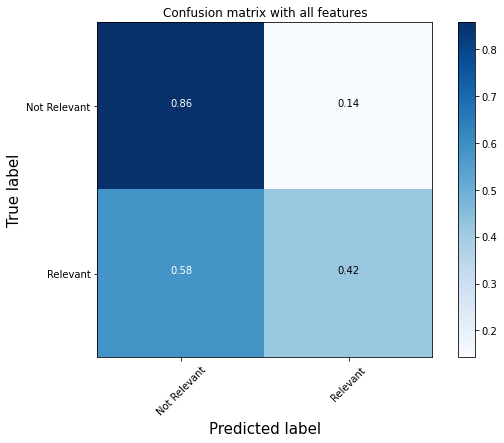

In [ ]:
# Step 4: Evaluate the classifier using various measures

# Function to plot confusion matrix. 
# Ref:http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
from sklearn.metrics import roc_auc_score

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)
    
    
# Print accuracy:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))

    
# print the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with all features')

# calculate AUC: Area under the curve(AUC) gives idea about the model efficiency:
# Further information: https://en.wikipedia.org/wiki/Receiver_operating_characteristic
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
print("ROC_AOC_Score: ", roc_auc_score(y_test, y_pred_prob))

We notice that the classifier is doing poorly with identifying relevant articles, while it is doing well with non-relevant ones. 
> Our large feature vector could be creating a lot of noise in the form of very rarely occurring features that are not useful for learning. 



### **Potential reasons for poor classifier performance**

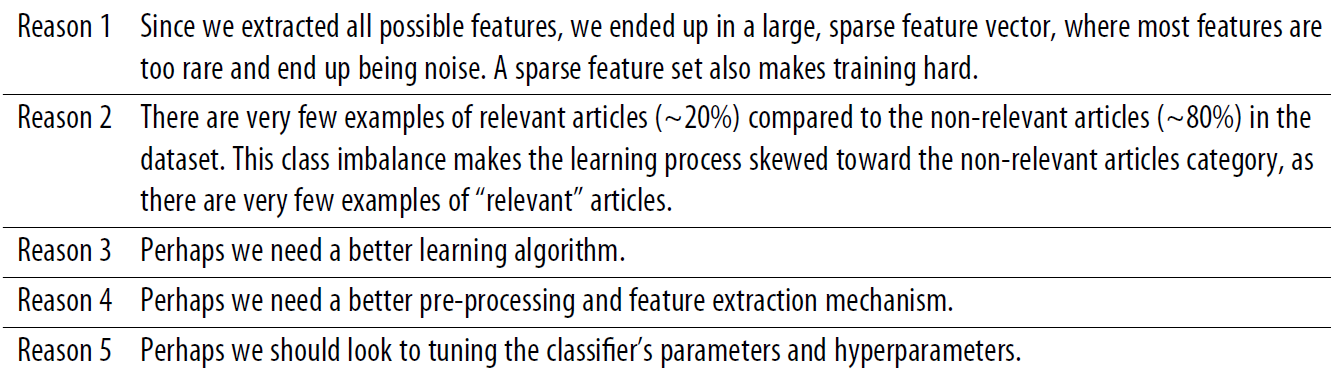

### **How to improve our classification performance**

One way to approach Reason 1 is to reduce noise in the feature vectors. The approach in the previous code example had close to 40,000 features. 

A large number of features introduce sparsity; i.e., most of the features in the feature vector are zero, and only a few values are non-zero. This, in turn, affects the ability of the text classification algorithm to learn.

Let’s see what happens if we restrict this to 5,000 and rerun the training and evaluation process. This requires us to change the CountVectorizer instantiation in the process, as shown in the code snippet below, and repeat all the steps.



CPU times: user 5.47 ms, sys: 0 ns, total: 5.47 ms
Wall time: 5.38 ms
Accuracy:  0.6876876876876877


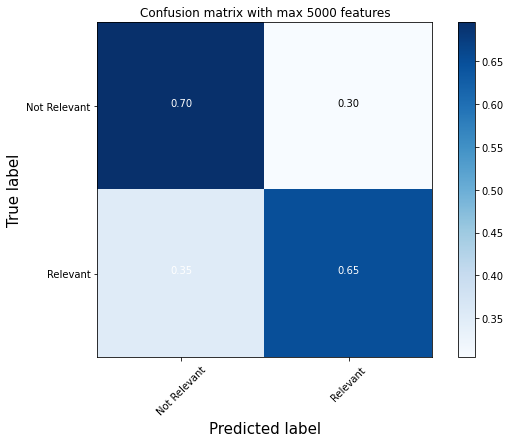

In [ ]:
vect = CountVectorizer(preprocessor=clean, max_features=5000) # Step-1

X_train_dtm = vect.fit_transform(X_train) # combined step 2 and 3
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
%time nb.fit(X_train_dtm, y_train) # train the model(timing it with an IPython "magic command")
y_pred_class = nb.predict(X_test_dtm) # make class predictions for X_test_dtm
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_class))

# print the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with max 5000 features')

Clearly, the performance on relevance classification got better by over 20% even though the overall accuracy fell by 10%. 



### **Addressing the class imbalance problem**

There are several ways to address the problem of skew in data. Two typical approaches are oversampling the instances belonging to minority classes or undersampling the majority class to create a balanced dataset. 

`Imbalanced-Learn` is a `Python` library that incorporates some of the sampling methods to address this issue. Classifiers also have a built-in mechanism to address such imbalanced datasets.

Let us try another classification algorithm and see if the performance changes. 

For this experiment, we have considered **logistic regression**, with `class_weight` attribute as "balanced", to address the problem of class imbalance in this dataset. 

## **Logistic Regression**

Logistic regression is a ***discriminative classifier*** and is commonly used in text classification, as a baseline in research, and as an MVP in real-world industry scenarios.

Accuracy:  0.7367367367367368
AUC:  0.7251117679464362


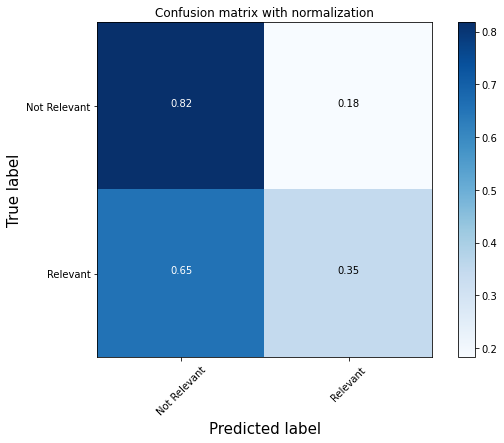

In [ ]:
from sklearn.linear_model import LogisticRegression # import

logreg = LogisticRegression(class_weight="balanced") # instantiate a logistic regression model
logreg.fit(X_train_dtm, y_train) # fit the model with training data

# Make predictions on test data
y_pred_class = logreg.predict(X_test_dtm)

# calculate evaluation measures:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))
print("AUC: ", roc_auc_score(y_test, y_pred_prob))
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with normalization')

Our logistic regression classifier instantiation has an argument class_weight, which is given a value “balanced”. This tells the classifier to boost the weights for classes in inverse proportion to the number of samples for that class. So, we expect to see better performance for the less-represented classes. 

**<font color="red">Students need to experiment with this code by removing that argument and retraining the classifier, to witness the change in the bottom-right cell of the confusion matrix.</font>**


However, logistic regression clearly seems to perform worse than Naive Bayes for this dataset.

## **Support Vector Machine**

A **support vector machine (SVM)**, first invented in the early 1960s, is a discriminative classifier like logistic regression. 

It aims to look for an optimal hyperplane in a higher dimensional space, which can separate the classes in the data by a maximum possible margin. 

Further, SVMs are capable of learning even non-linear separations between classes, unlike logistic regression. However, they may
also take longer to train.

SVMs come in various flavors in sklearn. Let’s see how one of them is used by keeping everything else the same and altering maximum features to 1,000 instead of the previous example’s 5,000. We restrict to 1,000 features, keeping in mind the time an SVM algorithm takes to train.

Accuracy:  0.6831831831831832
AUC:  0.7251117679464362


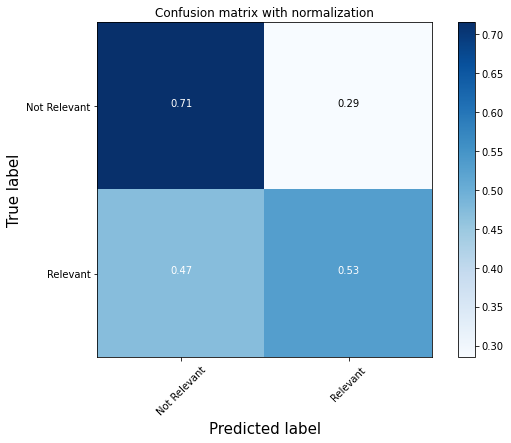

In [ ]:
from sklearn.svm import LinearSVC

vect = CountVectorizer(preprocessor=clean, max_features=1000) # Step-1
X_train_dtm = vect.fit_transform(X_train) # combined step 2 and 3
X_test_dtm = vect.transform(X_test)

classifier = LinearSVC(class_weight='balanced') # instantiate a logistic regression model
classifier.fit(X_train_dtm, y_train) # fit the model with training data

# Make predictions on test data
y_pred_class = classifier.predict(X_test_dtm)

# calculate evaluation measures:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))
print("AUC: ", roc_auc_score(y_test, y_pred_prob))
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with normalization')

So, how do we choose whats the best? If we look at overall accuracy alone, we should be choosing the very first classifier in this notebook. However, that is also doing poorly with identifying "relevant" articles. If we choose purely based on how good it is doing with "relevant" category, we should choose the second one we built. If we choose purely based on how good it is doing with "irrelevant" category, surely, nothing beats not building any classifier and just calling everything irrelevant! So, what to choose as the best among these depends on what we are looking for in our usecase! 